In [ ]:
#analysis library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#scaling
from sklearn.preprocessing import MinMaxScaler
#Ml Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
#metrics module
from sklearn.metrics import accuracy_score, classification_report, precision_score,recall_score 

In [ ]:
train_data = pd.read_csv("/content/train.csv")
x_test = pd.read_csv("/content/test.csv")
y_test = pd.read_csv("/content/gender_submission.csv")

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
x_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [ ]:
y_test.head(1)

,PassengerId,Survived
0,892,0


In [ ]:
print(train_data.shape)
print(x_test.shape)
print(y_test.shape)

(891, 12)
(418, 11)
(418, 2)


In [ ]:
#check the nan value in the data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_data.drop(["PassengerId","Name","Ticket","Cabin","Embarked"], axis=1, inplace=True)
x_test.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1, inplace=True)
y_test.drop(["PassengerId"],axis=1, inplace=True)

In [ ]:
#To make all data numerical we should convert the categorical vlaue
train_data["Sex"] = np.where(train_data["Sex"] == "female",1,0)
x_test["Sex"] = np.where(x_test["Sex"] == "female",1,0)

In [ ]:
train_data["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


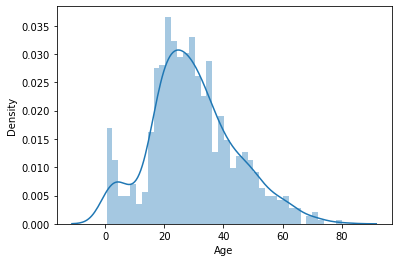

In [ ]:
#showing the distribution of the data
#data before the cleaning
sns.distplot(train_data["Age"], kde=True, bins=40)

In [ ]:
#the age have 177 nan value so we need to fill this nan value
train_data["Age"].fillna(train_data["Age"].mean(), inplace=True)

In [ ]:
#checking the nan value
train_data["Age"].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


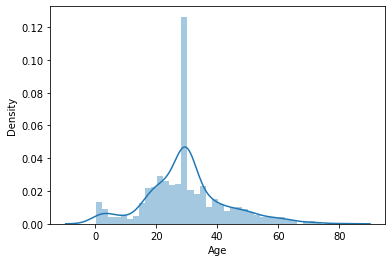

In [ ]:
#the distribution of Age after cleaning
sns.distplot(train_data["Age"], kde=True, bins=40)

In [ ]:
#train_data have been cleaning

In [ ]:
x_test.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


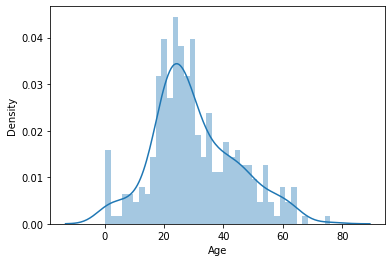

In [ ]:
#the distribution of Age of x_test before the cleaning
sns.distplot(x_test["Age"], kde=True, bins=40)

In [ ]:
x_test["Age"].fillna(x_test["Age"].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


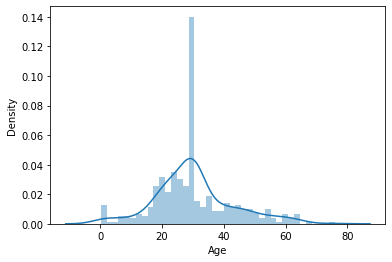

In [ ]:
#The distribution of x_test["Age"] after cleaning
sns.distplot(x_test["Age"], kde=True, bins=40)

In [ ]:
x_test["Fare"].fillna(x_test["Fare"].mean(),inplace=True)

In [ ]:
x_test.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

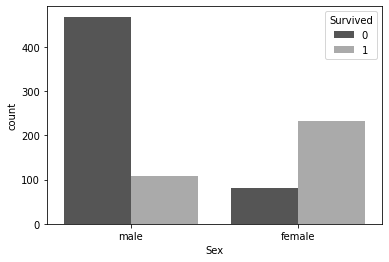

In [ ]:
data_copy = train_data.copy()
data_copy["Sex"] = train_data["Sex"].replace({1:"female",0:"male"})
sns.countplot(x=data_copy["Sex"], hue="Survived", data=train_data, palette="gray")

Text(0.5, 1.0, 'Survivor')

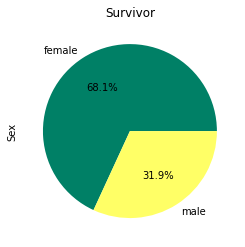

In [ ]:
data_copy["Sex"].loc[train_data["Survived"]==1].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="summer")
plt.title("Survivor")

In [ ]:
data_copy["Pclass"].loc[train_data["Survived"]==1].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

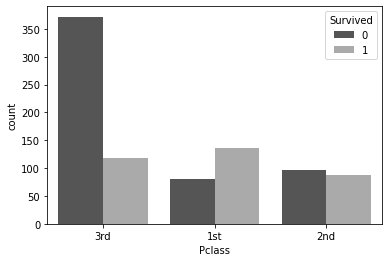

In [ ]:
data_copy["Pclass"] = train_data["Pclass"].replace({1:"1st",2:"2nd",3:"3rd"})
sns.countplot(x=data_copy["Pclass"], hue="Survived", data=train_data, palette="gray")

In [ ]:
corrmat = train_data.corr()

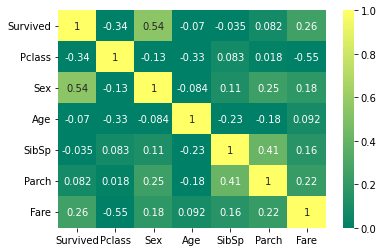

In [ ]:
sns.heatmap(corrmat, annot=True, vmin=0, cmap="summer")

In [ ]:
#we can do scaling for the data to make the value more closer 
norm = MinMaxScaler(feature_range = (0, 1))
x_train = train_data.drop(["Survived"], axis = 1)
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)
y_train = train_data["Survived"]

In [ ]:
MyModel = KNeighborsClassifier()

In [ ]:
K_values = np.array([2, 3, 5, 7, 9, 11])
metric = ["minkowski", "chebyshev"]
p = np.array([1, 2, 3, 4])
param_grid = {"n_neighbors": K_values, "metric": metric, "p": p}
GridKNN = GridSearchCV(estimator = MyModel, param_grid = param_grid,cv = 5)
GridKNN.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'chebyshev'],
                         'n_neighbors': array([ 2,  3,  5,  7,  9, 11]),
                         'p': array([1, 2, 3, 4])})

In [ ]:
print(GridKNN.best_score_)
print(GridKNN.best_estimator_.n_neighbors)
print(GridKNN.best_estimator_.metric)
print(GridKNN.best_estimator_.p)

0.8137279517921036
5
minkowski
1


In [ ]:
MyModel = KNeighborsClassifier(n_neighbors=5, p=1, metric = "minkowski")
MyModel.fit(x_train, y_train)

KNeighborsClassifier(p=1)

In [ ]:
MyModel.fit(x_train,y_train)

KNeighborsClassifier(p=1)

In [ ]:
y_predict = MyModel.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       266
           1       0.80      0.69      0.74       152

    accuracy                           0.82       418
   macro avg       0.82      0.79      0.80       418
weighted avg       0.82      0.82      0.82       418



In [ ]:
ModelNBGaussian = GaussianNB()
ModelNBMultino = MultinomialNB()
ModelNBGaussian.fit(x_train, y_train)
ModelNBMultino.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_predGaussian = ModelNBGaussian.predict(x_test)
y_predMultino = ModelNBMultino.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predGaussian))
print("___________________________________________")
print(classification_report(y_test,y_predMultino))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       266
           1       0.86      0.96      0.91       152

    accuracy                           0.93       418
   macro avg       0.92      0.94      0.92       418
weighted avg       0.93      0.93      0.93       418

___________________________________________
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       266
           1       1.00      0.99      0.99       152

    accuracy                           1.00       418
   macro avg       1.00      0.99      0.99       418
weighted avg       1.00      1.00      1.00       418

